In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [18]:
#fitting a KNN model with the MNIST dataset only performing scaling
X, y = datasets.load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, stratify=y, random_state=420)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

neigh = 3

knn = KNeighborsClassifier(n_neighbors=neigh)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9531001589825119

In [37]:
#Fitting the same KNN model on PCA reduced data

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=neigh)
knn_pca.fit(X_train_scaled_pca, y_train)
knn_pca.score(X_test_scaled_pca, y_test)

0.5421303656597775

<AxesSubplot: >

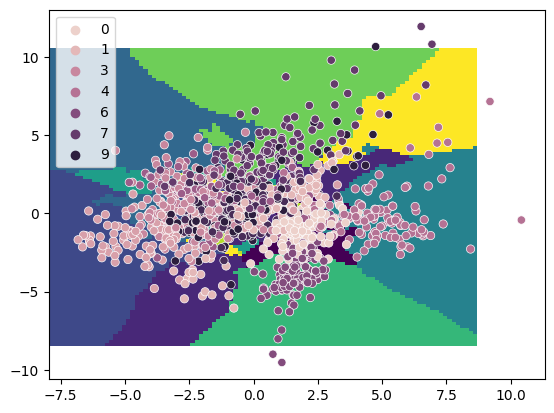

In [40]:
#Visualizing Neighbor Space
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

#create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    knn_pca, X_train_scaled_pca,
    #cmap = cmap_light,
    ax = ax,
    response_method = "predict", plot_method="pcolormesh", shading = 'auto'
)

sns.scatterplot(
    x = X_test_scaled_pca[:,0],
    y = X_test_scaled_pca[:,1],
 #   palette = cmap_bold,
    hue = y_test
)